Import Libraries
------------------------

In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import os


Import the Dataset (Data Source: https://archive.ics.uci.edu/ml/datasets/default%20of%20credit%20card%20clients)

In [2]:
#Importing the Credit Card Dataset
CardData=pd.read_csv('UCI_Credit_Card.csv')

Data Preprocessing
--------------------

In [3]:
print("Customer Credit Card Default Data -  Rows:{0} Columns:{1}".format(CardData.shape[0],CardData.shape[1]))

Customer Credit Card Default Data -  Rows:30000 Columns:25


In [4]:
CardData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
CardData.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [16]:
CardData[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','default.payment.next.month']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000


In [15]:
CardData[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [11]:
CardData[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
CardData[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [26]:
#looking for Missing Values in each column

columns=CardData.columns.values

for col in columns:
    print("Column Name : {}".format(col))
    print("Null Values : {}".format(CardData[col].isnull().sum()))
    print("NaN Values : {}".format(CardData[col].isna().sum()))
    print('*******************************************')
    
#Observation :There are no missing values in the dataset

Column Name : ID
Null Values : 0
NaN Values : 0
*******************************************
Column Name : LIMIT_BAL
Null Values : 0
NaN Values : 0
*******************************************
Column Name : SEX
Null Values : 0
NaN Values : 0
*******************************************
Column Name : EDUCATION
Null Values : 0
NaN Values : 0
*******************************************
Column Name : MARRIAGE
Null Values : 0
NaN Values : 0
*******************************************
Column Name : AGE
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_0
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_2
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_3
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_4
Null Values : 0
NaN Values : 0
*******************************************
Column Name : PAY_5
Null Values : 0
NaN Values

In [3]:
#Data Cleaning
#Rename the columns 'default.payment.next.month' and 'PAY_0'
CardData = CardData.rename(columns={'default.payment.next.month': 'Default', 
                        'PAY_0': 'PAY_1'})
CardData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

Univariant Analysis
----------------------------

In [19]:
#Distribution of the Class variable
CardData['Default'].value_counts()
#Observation :Non-Default customers - 23364, Default customers - 6636; 

0    23364
1     6636
Name: Default, dtype: int64

In [20]:
CardData.Default.sum() / len(CardData.Default)
#Observation :22.12% are default customers

0.2212

In [21]:
#Categorical Variables
CardData['SEX'].value_counts()
#Observation :There are more female credit card holders than men

2    18112
1    11888
Name: SEX, dtype: int64

In [23]:
CardData['EDUCATION'].value_counts()
#Observation :There are undefined values 0, 5, 6

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [24]:
CardData['MARRIAGE'].value_counts()
#Observation :There is an undefined value 0

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [25]:
# Repayment Status

paycolumns=CardData[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

for p in paycolumns:
    print("Column Name : {}".format(p))
    print("Unique Values : {}".format(CardData[p].value_counts()))
    print('*******************************************')

Column Name : PAY_1
Unique Values :  0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
*******************************************
Column Name : PAY_2
Unique Values :  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
*******************************************
Column Name : PAY_3
Unique Values :  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
*******************************************
Column Name : PAY_4
Unique Values :  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
*******************************************
Column Name : PAY_5
Unique Values :  0    16947


In [12]:
CardData.Default.sum() / len(CardData.Default)

6636

In [10]:
CardData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Data Cleaning
--------------------

In [4]:
#Remove the ID field from the dataset, since this is not essential for our Data Analysis
CardData.drop('ID',axis=1,inplace=True)

In [5]:
CardData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [6]:
# Changing values of the Education field which are 0,5,6 (unknown) to 4(Others)
CardData['EDUCATION']=CardData['EDUCATION'].apply(lambda ed: ed
                                                  if (ed>0 and ed<4) 
                                                      else 4)

In [7]:
CardData['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [8]:
# Changing values of the Marriage field which are 0(unknown) to 3(Others)
CardData['MARRIAGE']=CardData['MARRIAGE'].apply(lambda mar: mar
                                                  if (mar>0 and mar<3) 
                                                      else 3)

In [9]:
CardData['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

Data Visualization
-------------
Univariant analysis of the categorical variables was done in Tableau 
https://public.tableau.com/profile/jes7092#!/vizhome/UnivariantAnalysis-1/Dashboard1?publish=yes


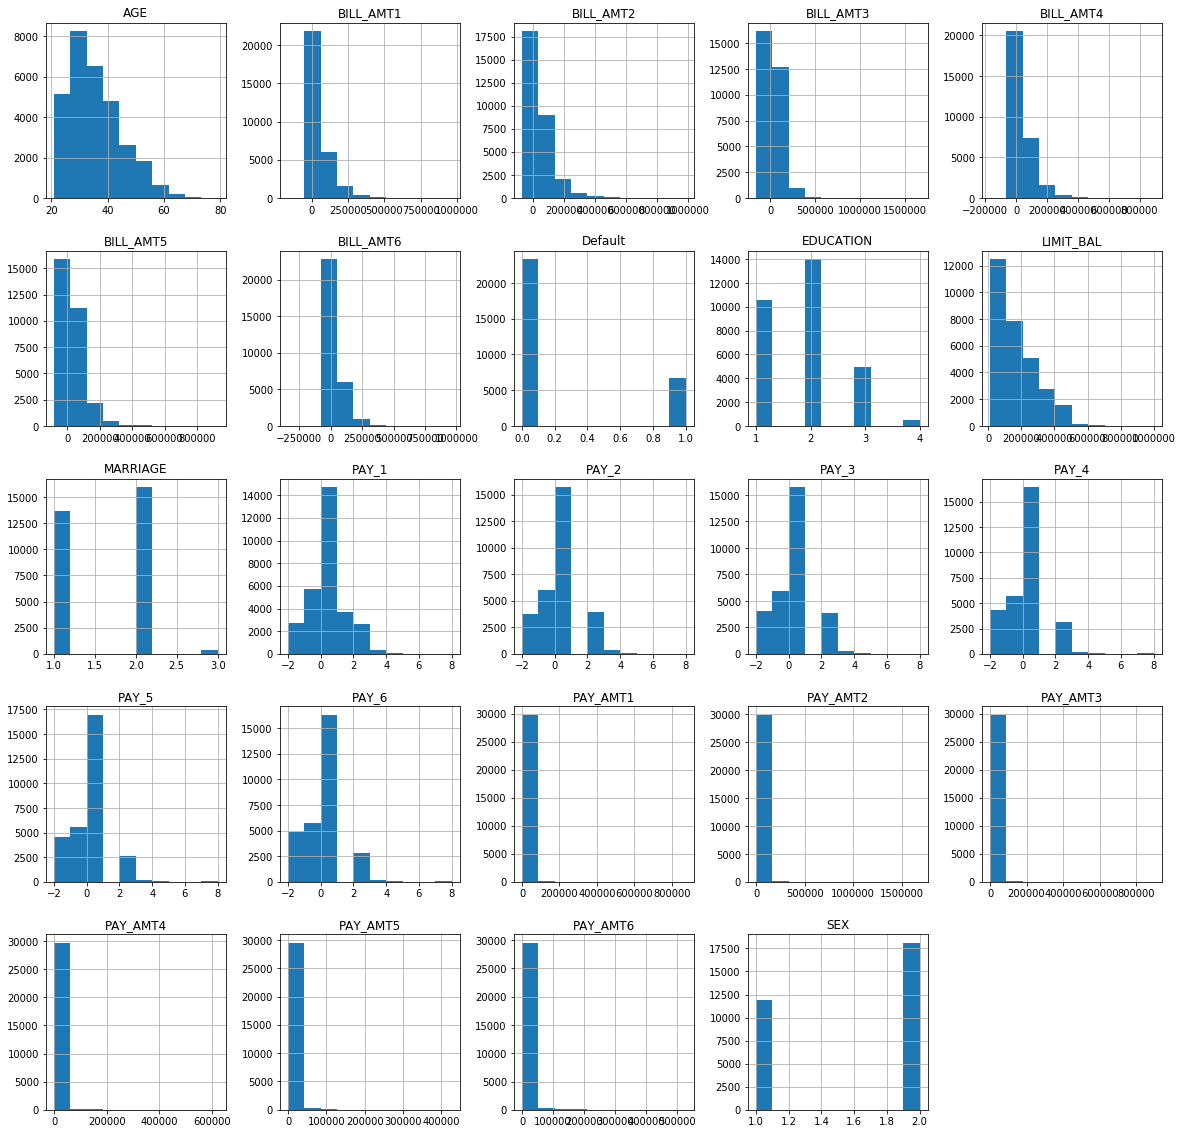

In [65]:
CardData.hist(figsize = (20, 20))
plt.show()

In [13]:

## Default Percentage

def calculate_percentage (total, default_count,label):
    print ("Percentage of {} is {} %".format(label,round(((default_count * 100) / total),2)))



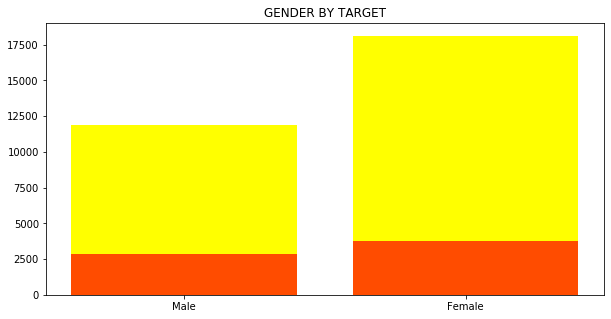

Percentage of Male Default is 24.17 %
Percentage of Female Default is 20.78 %


In [53]:
# Gender distribution by the class variable (Default)
# male = 1 , female = 2

male= CardData['SEX'][CardData['SEX']==1].count()
male_default = CardData['SEX'][(CardData['SEX']==1)&(CardData['Default']==1)].count()

female=CardData['SEX'][CardData['SEX']==2].count()
female_default = CardData['SEX'][(CardData['SEX']==2)&(CardData['Default']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]

plt.figure(figsize=(10,5))
plt.bar([0,1],gender_total, color='yellow')
plt.bar([0,1],default_gender_total, color='red',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])
plt.title('GENDER BY TARGET')
plt.show()

print ("Percentage of {} is {} %".format("Male Default",round(((male_default * 100) / male),2)))
print ("Percentage of {} is {} %".format("Female Default",round(((female_default * 100) / female),2)))

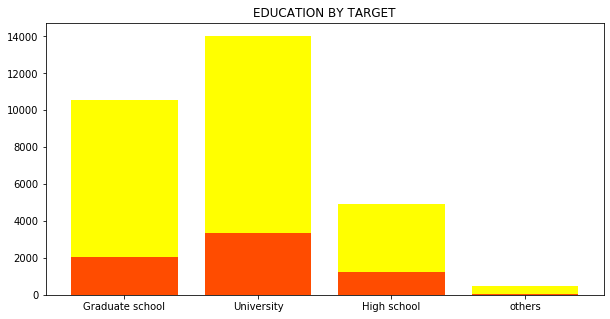

Percentage of Graduate school Default is 19.23 %
Percentage of University Default is 23.73 %
Percentage of High school Default is 25.16 %
Percentage of Others Default is 7.05 %


In [47]:
# Education distribution by the class variable (Default)
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)

graduate= CardData['EDUCATION'][CardData['EDUCATION']==1].count()
graduate_default = CardData['EDUCATION'][(CardData['EDUCATION']==1)&(CardData['Default']==1)].count()

university= CardData['EDUCATION'][CardData['EDUCATION']==2].count()
university_default = CardData['EDUCATION'][(CardData['EDUCATION']==2)&(CardData['Default']==1)].count()

high_sc= CardData['EDUCATION'][CardData['EDUCATION']==3].count()
high_sc_default = CardData['EDUCATION'][(CardData['EDUCATION']==3)&(CardData['Default']==1)].count()

others= CardData['EDUCATION'][CardData['EDUCATION']==4].count()
others_default = CardData['EDUCATION'][(CardData['EDUCATION']==4)&(CardData['Default']==1)].count()

educ_total = [graduate,university,high_sc,others]
default_educ_total=  [graduate_default,university_default,high_sc_default,others_default] 

plt.figure(figsize=(10,5))
plt.bar([1,2,3,4] , educ_total,color='yellow')
plt.bar([1,2,3,4] , default_educ_total,color='red', alpha = 0.7)
plt.xticks([1,2,3,4],['Graduate school','University','High school','others'])
plt.title('EDUCATION BY TARGET')
plt.show()

print ("Percentage of {} is {} %".format("Graduate school Default",round(((graduate_default * 100) / graduate ),2)))
print ("Percentage of {} is {} %".format("University Default",round(((university_default * 100) / university),2)))
print ("Percentage of {} is {} %".format("High school Default",round(((high_sc_default * 100) / high_sc),2)))
print ("Percentage of {} is {} %".format("Others Default",round(((others_default * 100) / others),2)))

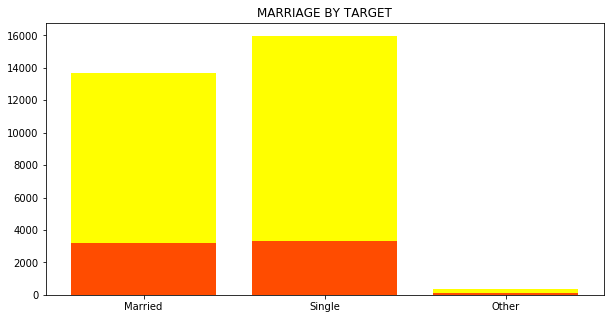

Percentage of Married Default is 23.47 %
Percentage of Single Default is 20.93 %
Percentage of Others Default is 23.61 %


In [50]:
# Marriage distribution by class variable (Default)
# 1=married, 2=single, 3=others

married= CardData['MARRIAGE'][CardData['MARRIAGE']==1].count()
married_default = CardData['MARRIAGE'][(CardData['MARRIAGE']==1)&(CardData['Default']==1)].count()

single=CardData['MARRIAGE'][CardData['MARRIAGE']==2].count()
single_default = CardData['MARRIAGE'][(CardData['MARRIAGE']==2)&(CardData['Default']==1)].count()

others=CardData['MARRIAGE'][CardData['MARRIAGE']==3].count()
others_default = CardData['MARRIAGE'][(CardData['MARRIAGE']==3)&(CardData['Default']==1)].count()

marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.figure(figsize=(10,5))
plt.bar([1,2,3],marriage_total, color='yellow')
plt.bar([1,2,3],default_marriage_total, color='red',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.title('MARRIAGE BY TARGET')
plt.show()

print ("Percentage of {} is {} %".format("Married Default",round(((married_default * 100) / married),2)))
print ("Percentage of {} is {} %".format("Single Default",round(((single_default * 100) / single),2)))
print ("Percentage of {} is {} %".format("Others Default",round(((others_default * 100) / others),2)))

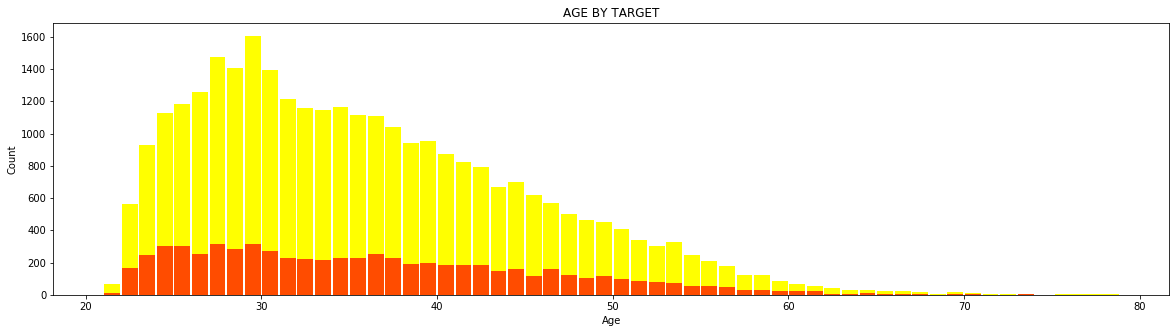

In [55]:
# Age distribution by class variable (Default)

plt.figure(figsize=(20,5))
plt.hist(CardData['AGE'], sorted(CardData['AGE'].unique()),rwidth=0.9, color ='yellow')
plt.hist(CardData['AGE'][(CardData['Default']==1)], sorted(CardData['AGE'].unique()),rwidth=0.9,color='red',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('AGE BY TARGET')
plt.show()

age_persentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])


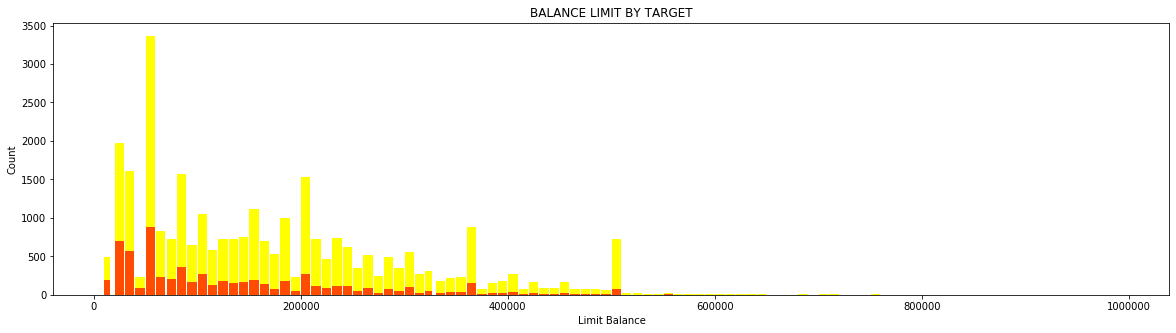

In [58]:
# Balance Limit Distribution by class variable (Default)
plt.figure(figsize=(20,5))
plt.hist(CardData['LIMIT_BAL'], sorted(CardData['LIMIT_BAL'].unique()),rwidth=0.9, color ='yellow')
plt.hist(CardData['LIMIT_BAL'][(CardData['Default']==1)], sorted(CardData['LIMIT_BAL'].unique()),rwidth=0.9,color='red',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
#plt.figure(figsize=(20,1))
plt.title("BALANCE LIMIT BY TARGET")
plt.show()

In [11]:
## takes the variables and add numbers 1 to 6 to the prefix
def getColNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

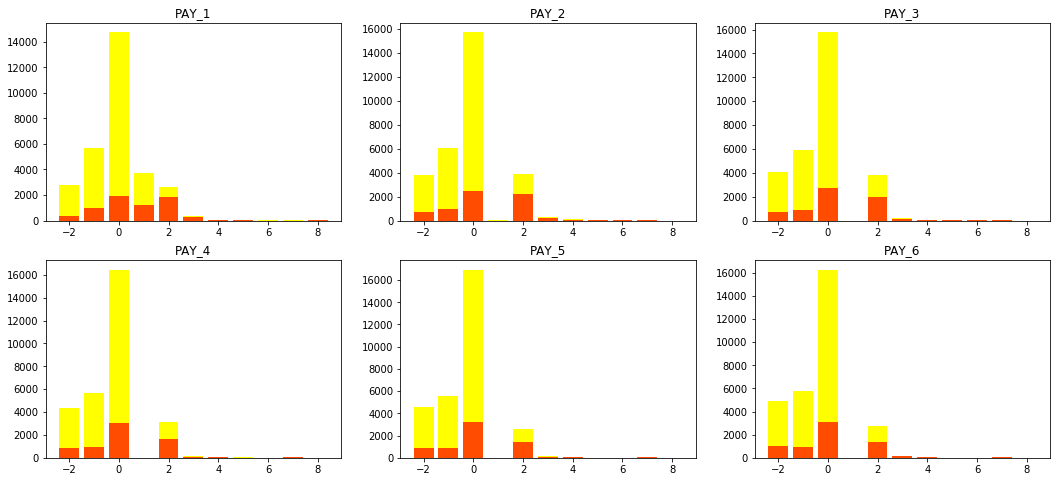

In [78]:

# Distribution of Repayment status (PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6) by Target
pay_cols = getColNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for p in range(len(pay_cols)):
    row,col = int(p/3), p%3

    pay_count  = CardData[pay_cols[p]].value_counts()
    pay_default = CardData[pay_cols[p]][(CardData['Default']==1)].value_counts()
    ax[row,col].bar(pay_count.index, pay_count, align='center', color='yellow')
    ax[row,col].bar(pay_default.index, pay_default, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_cols[p])
    
plt.show()

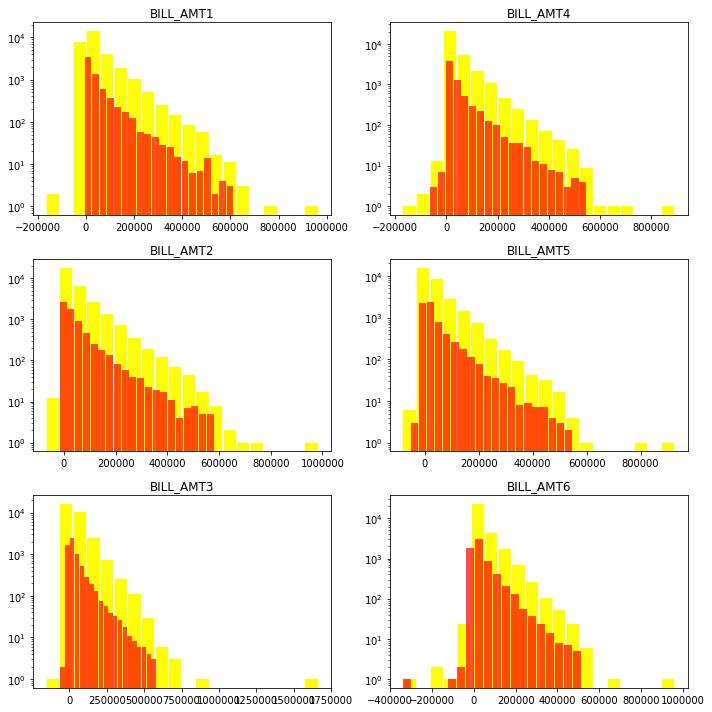

In [67]:
# BILL_AMT1 , BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6

bill_cols =  getColNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for b in range(len(bill_cols)):
    row,col =  b%3, int(b/3)
   
    ax[row,col].hist(CardData[bill_cols[b]], 20,rwidth=0.9, color ='yellow')
    ax[row,col].hist(CardData[bill_cols[b]][(CardData['Default']==1)],20,rwidth=0.9,color='red',alpha = 0.7)
    ax[row,col].set_title(bill_cols[b])
    
    #adding scaling to graph
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()



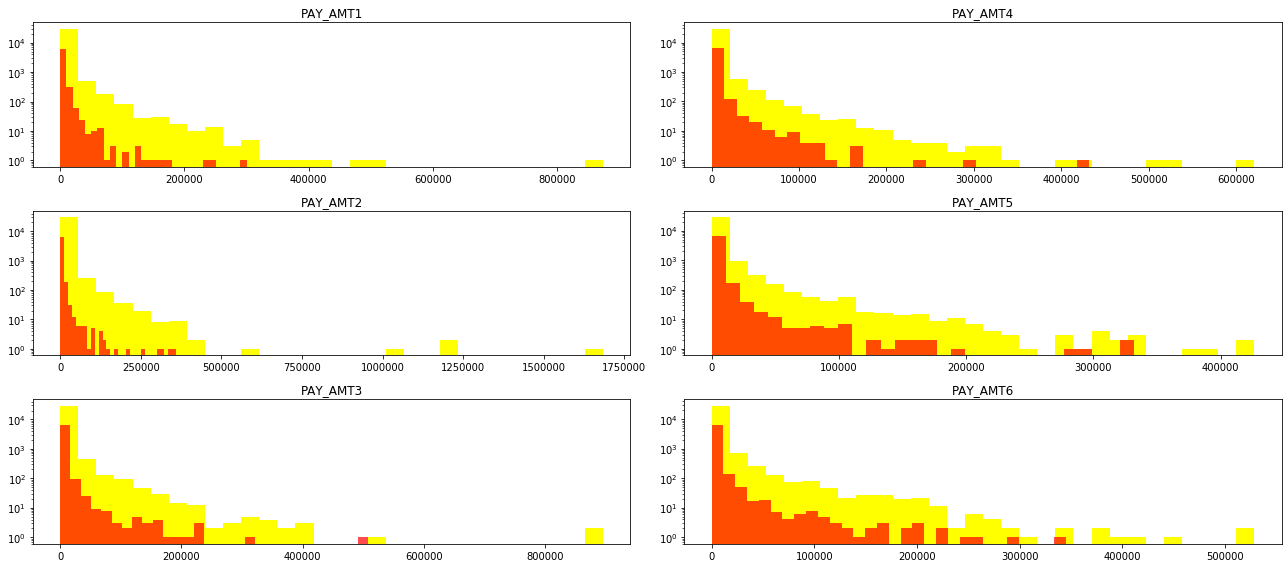

In [68]:
# Distribution of Previous Payment amount by Target
ppay_cols = getColNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for p in range(len(ppay_cols)):
    row,col =  p%3, int(p/3)
   
    ax[row,col].hist(CardData[ppay_cols[p]], 30, color ='yellow')
    ax[row,col].hist(CardData[ppay_cols[p]][(CardData['Default']==1)],30,color='red',alpha = 0.7)
    ax[row,col].set_title(ppay_cols[p])
    #adding scaling to graph
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

Correlation
-------------

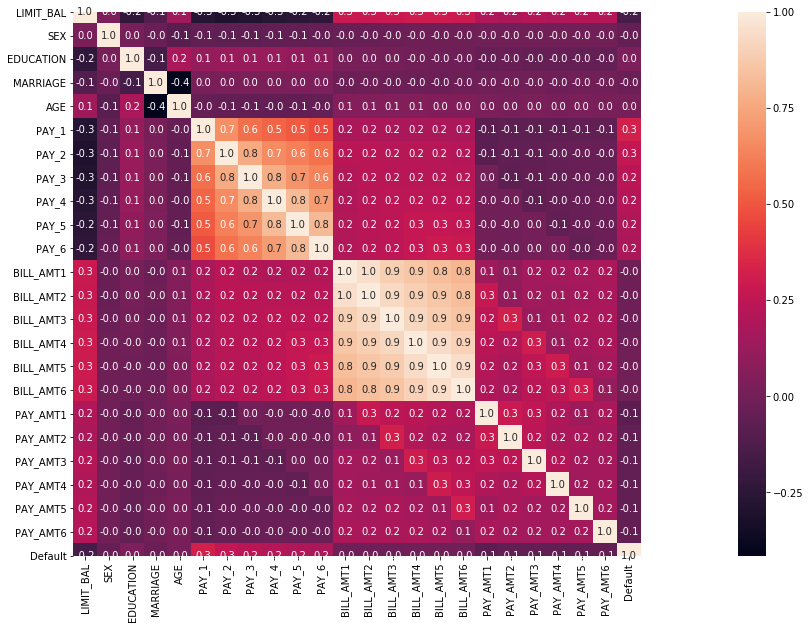

In [32]:
# Correlation Heatmap
#style.use('fivethirtyeight')
#sns.heatmap(CardData.corr())
plt.subplots(figsize=(35,10))
sns.heatmap(CardData.corr(), square=True, annot=True, fmt=".1f" )

In [17]:
#Correlation between every feature and the response

CardData.corr()['Default']


LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.033842
MARRIAGE    -0.027575
AGE          0.013890
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
Default      1.000000
Name: Default, dtype: float64

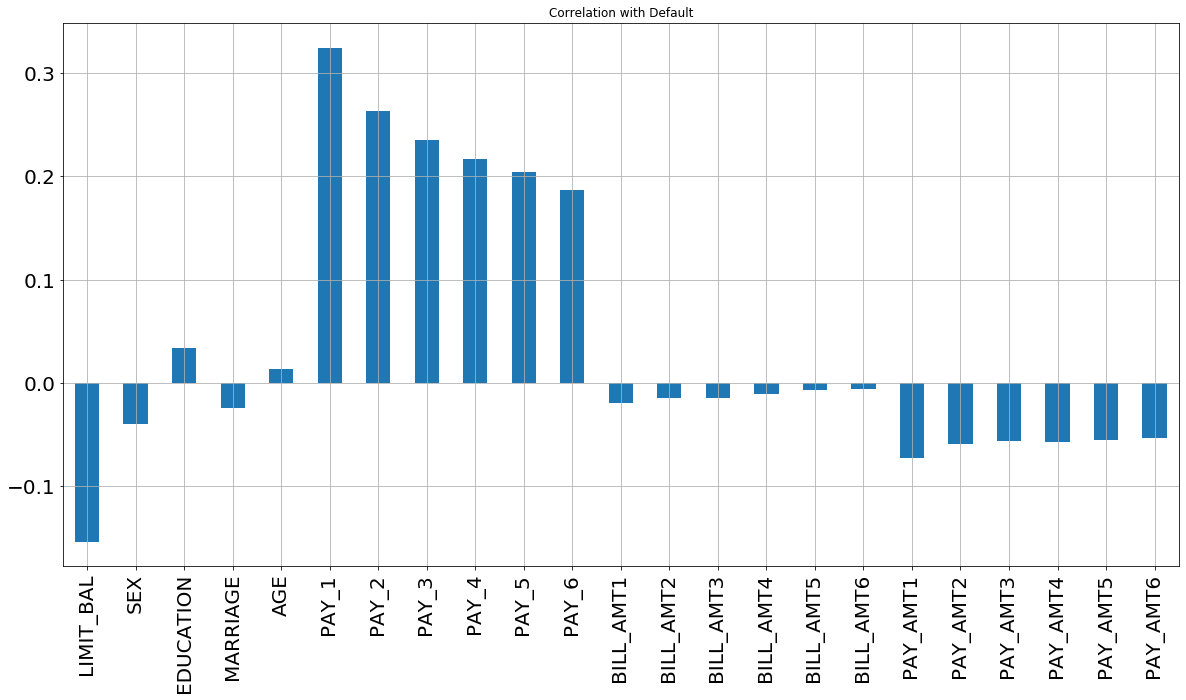

In [35]:
dataset=CardData.copy()
data = dataset.drop(['Default'],axis=1)
target = dataset['Default']

data.corrwith(dataset['Default']).plot.bar(figsize = (20, 10), title = "Correlation with Default", fontsize = 20, rot = 90, grid = True)

Outliers
-------

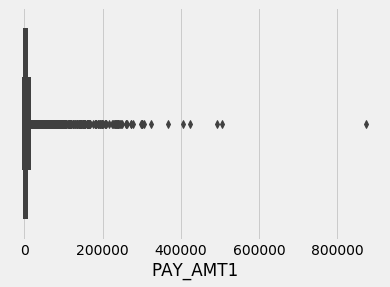

In [39]:
# Outliers
sns.boxplot(x='PAY_AMT1',data=CardData)

In [36]:
#outliers - Z-score function
from scipy import stats

z=np.abs(stats.zscore(CardData))
print(z)
threshold = 3
print(np.where(z>3))
CardData_o=CardData[(z<3).all(axis=1)]
CardData.shape
CardData_o.shape

#Observation:3303 rows have outliers, since it is around 11% and not erroneous we will keep those

[[1.13672015 0.81016074 0.21186989 ... 0.31413612 0.29338206 1.87637834]
 [0.3659805  0.81016074 0.21186989 ... 0.31413612 0.18087821 1.87637834]
 [0.59720239 0.81016074 0.21186989 ... 0.24868274 0.01212243 0.53294156]
 ...
 [1.05964618 1.23432296 0.21186989 ... 0.18322937 0.11900109 1.87637834]
 [0.67427636 1.23432296 1.55508562 ... 3.15253642 0.19190359 1.87637834]
 [0.90549825 1.23432296 0.21186989 ... 0.24868274 0.23713013 1.87637834]]
(array([    6,     6,     6, ..., 29997, 29998, 29998], dtype=int64), array([11, 12, 13, ...,  5, 17, 21], dtype=int64))


(26697, 24)

MODELS
------
Inorder to predict whether a customer would most likely default in the next month, we will be using different classification algorithms
* Logistic Regression
* Random Forest
* SVM
* Artifical Neural Networks

In [34]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [14]:
X = CardData.iloc[:, :-1].values
y = CardData.iloc[:, 23].values

In [15]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [17]:
y_train.shape

(21000, 1)

In [20]:
CardData.head

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0        20000.0    2          2         1   24      2      2     -1     -1   
1       120000.0    2          2         2   26     -1      2      0      0   
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0    1          3         1   39      0      0      0      0   
29996   150000.0    1          3         2   43     -1     -1     -1     -1   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BI

In [18]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(np.ravel(y_train))

In [19]:
#*************************************************************************************************************
#                                      LOGISTIC REGRESSION
#*************************************************************************************************************
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, np.ravel(y_train_encoded))
y_pred = lr.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lrscore = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore)

                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.816556   0.738056  0.230928  0.351786  0.604203


In [21]:
#CROSS VALIDATION
CV_score_LR=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)
print('cross_val_score: ',CV_score_LR.mean().round(4))

cross_val_score:  0.7788


In [22]:
#*************************************************************************************************************
#                                                   SVM
#*************************************************************************************************************
svm = SVC(gamma='auto')
svm.fit(X_train, np.ravel(y_train_encoded))

y_pred = svm.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svmscore = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(svmscore)

  Model  Accuracy  Precision    Recall  F1 Score       ROC
0   SVM  0.822667   0.681053  0.333505  0.447751  0.645294


In [ ]:
# Cross Validation - SVM
CV_score_svm=cross_val_score(SVC(gamma='auto'), X, y,cv=5)
print('cross_val_score: ',CV_score_svm.mean().round(4))

In [23]:
#*************************************************************************************************************
#                                              Random Forest
#*************************************************************************************************************
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, np.ravel(y_train_encoded))
y_pred = rf.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rfscore = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore)

           Model  Accuracy  Precision    Recall  F1 Score      ROC
0  Random Forest  0.815667   0.633428  0.343814  0.445707  0.64457


In [42]:
#rocCurve(rf,X_test,y_test,"Random Forest")

In [24]:
# Cross Validation - Random Forest
CV_score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=10)
print('cross_val_score: ',CV_score_rf.mean().round(4))

cross_val_score:  0.8139


In [39]:
#********************************************************************************************************
#                                  Artificial Neural Networks
#********************************************************************************************************
from sklearn.neural_network import MLPClassifier
#ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
ann= MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
ann.fit(X_train, np.ravel(y_train_encoded))
y_pred = ann.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

annscore = pd.DataFrame([['Neural Networks', acc,prec,rec, f1,roc]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(annscore)

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



             Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Neural Networks  0.821889   0.657036  0.363402  0.467972  0.655639


In [41]:
# Cross Validation - Neural Networks
CV_score_ann=cross_val_score(MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,activation = 'relu',solver='sgd',random_state=1),X, y,cv=10)
print('cross_val_score: ',CV_score_ann.mean().round(4))

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimize

cross_val_score:  0.7788


C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:749: RuntimeWarning:

invalid value encountered in greater



UNDER-SAMPLING
-------

In [45]:
#class count
count_class_0, count_class_1 = CardData['Default'].value_counts()

cc_class_0=CardData[CardData['Default']==0]
cc_class_1=CardData[CardData['Default']==1]

Random under-sampling:
1    6636
0    6636
Name: Default, dtype: int64


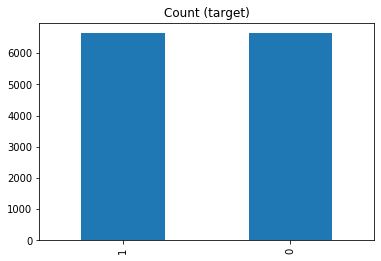

In [46]:
# Random UnderSampling
cc_class_0_under = cc_class_0.sample(count_class_1)
cc_under = pd.concat([cc_class_0_under, cc_class_1], axis=0)

print('Random under-sampling:')
print(cc_under['Default'].value_counts())

cc_under['Default'].value_counts().plot(kind='bar', title='Count (target)');

In [47]:
X_u = cc_under.iloc[:, :-1].values
y_u = cc_under.iloc[:, 23].values

In [48]:
# Splitting the dataset into the Training set and Test set
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size = 0.3, random_state = 0)

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X_u = StandardScaler()
X_train_u = sc_X_u.fit_transform(X_train_u)
X_test_u = sc_X_u.transform(X_test_u)
sc_y_u = StandardScaler()
y_train_u = sc_y_u.fit_transform(y_train_u.reshape(-1,1))

In [50]:
y_train_u.shape

(9290, 1)

In [51]:
cc_under.head

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
12643    50000.0    1          1         2   27     -2     -2     -2     -2   
19445    50000.0    2          1         2   24      0      0      0      0   
21476   150000.0    2          3         1   28      0      0      0      0   
28446   180000.0    2          2         1   44     -2     -2     -2     -2   
8771    320000.0    2          2         1   53      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29991   210000.0    1          2         1   34      3      2      2      2   
29994    80000.0    1          2         2   34      2      2      2      2   
29997    30000.0    1          2         2   37      4      3      2     -1   
29998    80000.0    1          3         1   41      1     -1      0      0   
29999    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BI

In [52]:
lab_enc_u = preprocessing.LabelEncoder()
y_train_encoded_u = lab_enc_u.fit_transform(np.ravel(y_train_u))

In [56]:
#*************************************************************************************************************
#                                      LOGISTIC REGRESSION
#*************************************************************************************************************
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train_u, np.ravel(y_train_encoded_u))
y_pred_u = lr.predict(X_test_u)
roc=roc_auc_score(y_test_u, y_pred_u)
acc = accuracy_score(y_test_u, y_pred_u)
prec = precision_score(y_test_u, y_pred_u)
rec = recall_score(y_test_u, y_pred_u)
f1 = f1_score(y_test_u, y_pred_u)

lrscore_u = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore_u)

                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.683074   0.719064  0.629883  0.671525  0.684642


In [54]:
#Cross Validation - Logistic Regression
CV_score_LR_u=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_u, y_u,cv=10)
print('cross_val_score: ',CV_score_LR_u.mean().round(4))

cross_val_score:  0.6259


In [57]:
#*************************************************************************************************************
#                                             SVM
#*************************************************************************************************************
svm = SVC(gamma='auto')
svm.fit(X_train_u, np.ravel(y_train_encoded_u))

y_pred_u = svm.predict(X_test_u)
roc=roc_auc_score(y_test_u, y_pred_u)
acc = accuracy_score(y_test_u, y_pred_u)
prec = precision_score(y_test_u, y_pred_u)
rec = recall_score(y_test_u, y_pred_u)
f1 = f1_score(y_test_u, y_pred_u)

svmscore_u = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(svmscore_u)

  Model  Accuracy  Precision    Recall  F1 Score      ROC
0   SVM  0.703918   0.786799  0.582031  0.669099  0.70751


In [ ]:
#Cross Validation - SVM
CV_score_svm=cross_val_score(SVC(gamma='auto'), X, y,cv=5)
print('cross_val_score: ',CV_score_svm.mean().round(4))

In [58]:
#*************************************************************************************************************
#                                               RANDOM FOREST
#*************************************************************************************************************
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_u, np.ravel(y_train_encoded_u))
y_pred_u = rf.predict(X_test_u)
roc=roc_auc_score(y_test_u, y_pred_u)
acc = accuracy_score(y_test_u, y_pred_u)
prec = precision_score(y_test_u, y_pred_u)
rec = recall_score(y_test_u, y_pred_u)
f1 = f1_score(y_test_u, y_pred_u)

rfscore_u = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore_u)

           Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest  0.700151   0.742614  0.638184   0.68645  0.701977


In [59]:
# Cross Validation - Random Forest
CV_score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),X_u, y_u,cv=10)
print('cross_val_score: ',CV_score_rf.mean().round(4))

cross_val_score:  0.6978


In [60]:
#********************************************************************************************************
#                                  Artificial Neural Networks
#********************************************************************************************************
from sklearn.neural_network import MLPClassifier
#ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
ann= MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
ann.fit(X_train_u, np.ravel(y_train_encoded_u))
y_pred_u = ann.predict(X_test_u)
roc=roc_auc_score(y_test_u, y_pred_u)
acc = accuracy_score(y_test_u, y_pred_u)
prec = precision_score(y_test_u, y_pred_u)
rec = recall_score(y_test_u, y_pred_u)
f1 = f1_score(y_test_u, y_pred_u)

annscore_u = pd.DataFrame([['Neural Networks', acc,prec,rec, f1,roc]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(annscore_u)

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



             Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Neural Networks  0.697891   0.757465  0.606934  0.673895  0.700571


In [ ]:
# Cross Validation - Neural Networks
CV_score_ann=cross_val_score(MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,activation = 'relu',solver='sgd',random_state=1),X_u, y_u,cv=10)
print('cross_val_score: ',CV_score_ann.mean().round(4))

Over-Sampling
------------

Random over-sampling:
1    23364
0    23364
Name: Default, dtype: int64


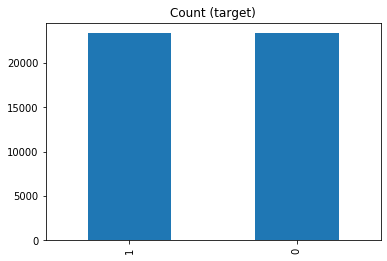

In [61]:
#Random OverSampling
cc_class_1_over = cc_class_1.sample(count_class_0, replace=True)
cc_over = pd.concat([cc_class_0, cc_class_1_over], axis=0)

print('Random over-sampling:')
print(cc_over['Default'].value_counts())

cc_over['Default'].value_counts().plot(kind='bar', title='Count (target)');

In [62]:
X_o = cc_over.iloc[:, :-1].values
y_o = cc_over.iloc[:, 23].values

In [63]:
# Splitting the dataset into the Training set and Test set
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size = 0.3, random_state = 0)

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X_o = StandardScaler()
X_train_o = sc_X_o.fit_transform(X_train_o)
X_test_o = sc_X_o.transform(X_test_o)
sc_y_o = StandardScaler()
y_train_o = sc_y_o.fit_transform(y_train_o.reshape(-1,1))

In [65]:
y_train_o.shape

(32709, 1)

In [66]:
cc_over.head

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
2        90000.0    2          2         2   34      0      0      0      0   
3        50000.0    2          2         1   37      0      0      0      0   
4        50000.0    1          2         1   57     -1      0     -1      0   
5        50000.0    1          1         2   37      0      0      0      0   
6       500000.0    1          1         2   29      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
10069   130000.0    2          2         1   36      2      2      0      0   
19269    80000.0    2          3         1   39     -1     -1     -1      0   
6029    180000.0    2          3         1   42     -1     -1     -1      0   
8177     70000.0    2          2         1   32      3      3      4      4   
26781    70000.0    1          1         2   27      0      0      2      4   

       PAY_5  ...  BI

In [67]:
lab_enc_o = preprocessing.LabelEncoder()
y_train_encoded_o = lab_enc_o.fit_transform(np.ravel(y_train_o))

In [68]:
#*************************************************************************************************************
#                                      LOGISTIC REGRESSION
#*************************************************************************************************************
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train_o, np.ravel(y_train_encoded_o))
y_pred_o = lr.predict(X_test_o)
roc=roc_auc_score(y_test_o, y_pred_o)
acc = accuracy_score(y_test_o, y_pred_o)
prec = precision_score(y_test_o, y_pred_o)
rec = recall_score(y_test_o, y_pred_o)
f1 = f1_score(y_test_o, y_pred_o)

lrscore_o = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(lrscore_o)

                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.676368   0.691799  0.639545  0.664646  0.676476


In [69]:
#Cross Validation - Logistic Regression
CV_score_LR_o=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_o, y_o,cv=10)
print('cross_val_score: ',CV_score_LR_o.mean().round(4))

cross_val_score:  0.6198


In [70]:
#*************************************************************************************************************
#                                             SVM
#*************************************************************************************************************
svm = SVC(gamma='auto')
svm.fit(X_train_o, np.ravel(y_train_encoded_o))

y_pred_o = svm.predict(X_test_o)
roc=roc_auc_score(y_test_o, y_pred_o)
acc = accuracy_score(y_test_o, y_pred_o)
prec = precision_score(y_test_o, y_pred_o)
rec = recall_score(y_test_o, y_pred_o)
f1 = f1_score(y_test_o, y_pred_o)

svmscore_o = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(svmscore_o)

  Model  Accuracy  Precision    Recall  F1 Score       ROC
0   SVM  0.720522   0.782909  0.612518   0.68731  0.720839


In [ ]:
#Cross Validation - SVM
CV_score_svm_o=cross_val_score(SVC(gamma='auto'), X_o, y_o,cv=5)
print('cross_val_score: ',CV_score_svm_o.mean().round(4))

In [71]:
#*************************************************************************************************************
#                                               RANDOM FOREST
#*************************************************************************************************************
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_o, np.ravel(y_train_encoded_o))
y_pred_o = rf.predict(X_test_o)
roc=roc_auc_score(y_test_o, y_pred_o)
acc = accuracy_score(y_test_o, y_pred_o)
prec = precision_score(y_test_o, y_pred_o)
rec = recall_score(y_test_o, y_pred_o)
f1 = f1_score(y_test_o, y_pred_o)

rfscore_o = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(rfscore_o)

           Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest  0.925744   0.901785  0.956046  0.928123  0.925655


In [72]:
# Cross Validation - Random Forest
CV_score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),X_o, y_o,cv=10)
print('cross_val_score: ',CV_score_rf.mean().round(4))

cross_val_score:  0.9439


In [74]:
#********************************************************************************************************
#                                  Artificial Neural Networks
#********************************************************************************************************
from sklearn.neural_network import MLPClassifier
#ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001, solver='sgd', verbose=10, random_state=21, tol=0.000000001)
ann= MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,activation = 'relu',solver='sgd',random_state=1)
ann.fit(X_train_o, np.ravel(y_train_encoded_o))
y_pred_o = ann.predict(X_test_o)
roc=roc_auc_score(y_test_o, y_pred_o)
acc = accuracy_score(y_test_o, y_pred_o)
prec = precision_score(y_test_o, y_pred_o)
rec = recall_score(y_test_o, y_pred_o)
f1 = f1_score(y_test_o, y_pred_o)

annscore_o = pd.DataFrame([['Neural Networks', acc,prec,rec, f1,roc]], 
                        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(annscore_o)

C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



             Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Neural Networks  0.721235   0.752018  0.662589  0.704477  0.721407


In [ ]:
# Cross Validation - Neural Networks
CV_score_ann=cross_val_score(MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=100,activation = 'relu',solver='sgd',random_state=1),X_o, y_o,cv=10)
print('cross_val_score: ',CV_score_ann.mean().round(4))

Over-Sampling : SMOTE
---------

In [80]:
#import imblearn
from imblearn.over_sampling import SMOTE

X = CardData.iloc[:, :-1].values
y = CardData.iloc[:, 23].values

smote= SMOTE(ratio='minority')
X_sm, y_sm= smote.fit_sample(X,y)

print('Over-sampling : SMOTE')
print(y_sm.value_counts())

y_sm.value_counts().plot(kind='bar', title='Count (target)');

ImportError: cannot import name 'lobpcg' from 'sklearn.utils.fixes' (C:\Users\jesle\Anaconda3\lib\site-packages\sklearn\utils\fixes.py)

LOGISTIC REGRESSION
-------

Parameter tunning using k fold cross validation
---------

In [18]:

scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),X, y, cv=10)
np.average(scores1)

NameError: name 'cross_val_score' is not defined

In [85]:

scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),X, y, cv=10)
np.average(scores2)

0.8123361166151242

In [86]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),X, y, cv=10)
np.average(scores3)

0.8140019945817031

In [87]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),X, y, cv=10)
np.average(scores4)


0.8136027945003106

In [89]:
score5 = cross_val_score(RandomForestClassifier(n_estimators=50),X, y, cv=10)
np.average(score5)

0.8152030501558946

In [ ]:
# Feature Importance - Random Forest
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()